In [1]:
import numpy as np
import pandas as pd
import pandas_datareader as web
import math
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense,LSTM
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('D:\Python projects\Microsoft_price_prediction_LSTM_NN/MSFT.csv')

In [3]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,1986-03-13,0.088542,0.101563,0.088542,0.097222,0.061434,1031788800
1,1986-03-14,0.097222,0.102431,0.097222,0.100694,0.063628,308160000
2,1986-03-17,0.100694,0.103299,0.100694,0.102431,0.064725,133171200
3,1986-03-18,0.102431,0.103299,0.098958,0.099826,0.063079,67766400
4,1986-03-19,0.099826,0.100694,0.097222,0.098090,0.061982,47894400
...,...,...,...,...,...,...,...
9078,2022-03-18,295.369995,301.000000,292.730011,300.429993,300.429993,43317000
9079,2022-03-21,298.890015,300.140015,294.899994,299.160004,299.160004,28351200
9080,2022-03-22,299.799988,305.000000,298.769989,304.059998,304.059998,27599700
9081,2022-03-23,300.510010,303.230011,297.720001,299.489990,299.489990,25715400


In [4]:
df.shape

(9083, 7)

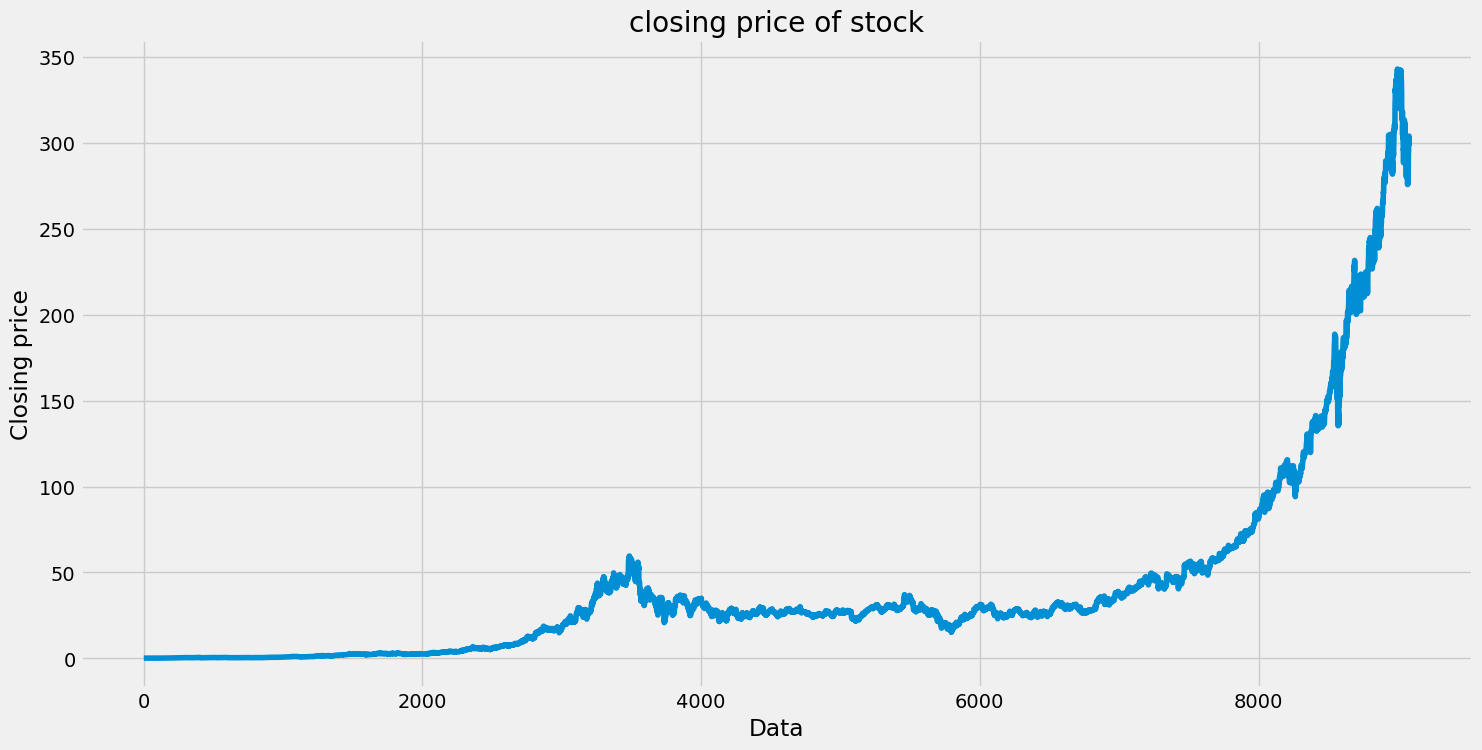

In [5]:
#visualise the closing prices
plt.figure(figsize=(16,8))
plt.title('closing price of stock')
plt.plot(df['Close'])
plt.xlabel('Data')
plt.ylabel('Closing price')
plt.show()

In [7]:
data = df.filter(['Close'])
dataset= data.values
training_data_len=math.ceil(len(dataset)*0.8)
training_data_len

7267

In [8]:
scaler = StandardScaler()
scaled_data=scaler.fit_transform(dataset)
print("Mean of processedd data: ",scaled_data.mean())
print("Std deviation of processedd data: ",scaled_data.std())



Mean of processedd data:  1.0013153162753806e-16
Std deviation of processedd data:  1.0


In [9]:
train_data=scaled_data[0:training_data_len, :]
x_train=[]
y_train=[]
for i in range(60,len(train_data)):
    x_train.append(train_data[i-60:i])
    y_train.append(train_data[i])

In [10]:
x_train,y_train = np.array(x_train),np.array(y_train)
x_train.shape

(7207, 60, 1)

In [11]:
#reshape data
print("x_train  shape before reshaping", x_train.shape)
x_train= np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
print("x_train  shape after reshaping", x_train.shape)


x_train  shape before reshaping (7207, 60, 1)
x_train  shape after reshaping (7207, 60, 1)


In [12]:
model = Sequential()
model.add(LSTM(200,return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(LSTM(200, return_sequences=False))
model.add(Dense(100))
model.add(Dense(50))
model.add(Dense(1))

In [13]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 60, 200)           161600    
                                                                 
 lstm_1 (LSTM)               (None, 200)               320800    
                                                                 
 dense (Dense)               (None, 100)               20100     
                                                                 
 dense_1 (Dense)             (None, 50)                5050      
                                                                 
 dense_2 (Dense)             (None, 1)                 51        
                                                                 
Total params: 507,601
Trainable params: 507,601
Non-trainable params: 0
_________________________________________________________________


In [15]:
history = model.fit(x_train,y_train,epochs=5)
#increase epochs for better results


Epoch 1/5
226/226 [==============================] - 33s 130ms/step - loss: 0.0028
Epoch 2/5
226/226 [==============================] - 33s 147ms/step - loss: 2.3191e-04
Epoch 3/5
226/226 [==============================] - 33s 147ms/step - loss: 2.0175e-04
Epoch 4/5
226/226 [==============================] - 34s 151ms/step - loss: 1.9277e-04
Epoch 5/5
226/226 [==============================] - 35s 154ms/step - loss: 1.7640e-04


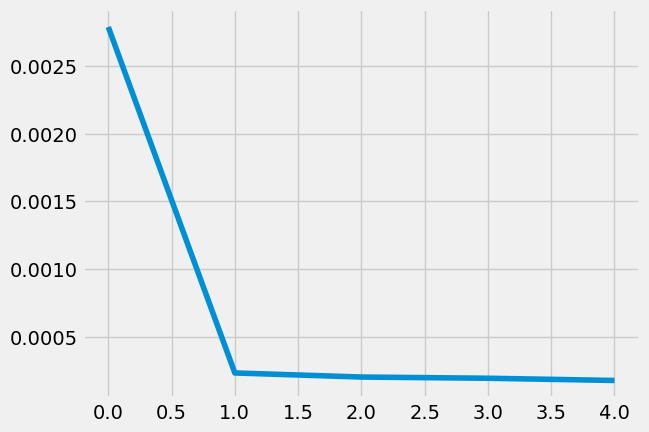

In [16]:
plt.plot(history.history['loss'])

In [18]:
test_data=scaled_data[training_data_len-60:, :]
x_test=[]
y_test= dataset[training_data_len: , :]
for i in range(60,len(test_data)):
    x_test.append(test_data[i-60:i, 0])

In [19]:
x_test=np.array(x_test)

In [20]:
print("x_test shape before reshaping", x_test.shape)
x_test=np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))
print("x_test shape after reshaping", x_test.shape)

x_test shape before reshaping (1816, 60)
x_test shape after reshaping (1816, 60, 1)


In [21]:
predictions =model.predict(x_test)
predictions=scaler.inverse_transform(predictions)
print(predictions)

57/57 [==============================] - 3s 40ms/step
[[ 46.768745]
 [ 46.82658 ]
 [ 46.980354]
 ...
 [255.04094 ]
 [258.20496 ]
 [260.2858  ]]
